## About the data

Dataset of diabetes, taken from the hospital Frankfurt, Germany
The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database.

Dataset link - https://www.kaggle.com/johndasilva/diabetes


## Content

The datasets consists of several medical predictor variables and one target variable, Outcome. Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.

## Properties

Pregnancies - Number of times pregnant

Glucose - Plasma glucose concentration a 2 hours in an oral glucose tolerance test

BloodPressure - Diastolic blood pressure (mm Hg)

SkinThickness - Triceps skin fold thickness (mm)

Insulin - 2-Hour serum insulin (mu U/ml)

BMI - Body mass index (weight in kg/(height in m)^2)

DiabetesPedigreeFunction - Diabetes pedigree function

Age - Age (years)

Outcome - Class variable (0 or 1) 


Dataset consists of 2000 rows

In [28]:
!pip install modin

In [29]:
!pip install scikit-learn-intelex

In [30]:
from sklearnex import patch_sklearn
patch_sklearn()

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [31]:
# Importing libraries
import modin.pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [32]:
# Reading data
df = pd.read_csv("../input/diabetes/diabetes.csv")

In [33]:
# determining dataset size
df.shape

(2000, 9)

In [34]:
# printing 1st 5rows
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0


In [35]:
# determining types of data
df.info()

<class 'modin.pandas.dataframe.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------------------------  --------------  -----  
 0   Pregnancies               2000 non-null   int64
 1   Glucose                   2000 non-null   int64
 2   BloodPressure             2000 non-null   int64
 3   SkinThickness             2000 non-null   int64
 4   Insulin                   2000 non-null   int64
 5   BMI                       2000 non-null   float64
 6   DiabetesPedigreeFunction  2000 non-null   float64
 7   Age                       2000 non-null   int64
 8   Outcome                   2000 non-null   int64
dtypes: int64(7), float64(2)
memory usage: 140.8 KB


There are no missing values & all the columns consist of numeric data

In [36]:
# basic statistics
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,3.703500,121.182500,69.145500,20.935000,80.254000,32.193000,0.470930,33.090500,0.342000
std,3.306063,32.068636,19.188315,16.103243,111.180534,8.149901,0.323553,11.786423,0.474498
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,63.500000,0.000000,0.000000,27.375000,0.244000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,40.000000,32.300000,0.376000,29.000000,0.000000
75%,6.000000,141.000000,80.000000,32.000000,130.000000,36.800000,0.624000,40.000000,1.000000
max,17.000000,199.000000,122.000000,110.000000,744.000000,80.600000,2.420000,81.000000,1.000000


In [37]:
# checking dataset is balanced or not
diabetes_true_count = len(df.loc[df['Outcome'] == 1])
diabetes_false_count = len(df.loc[df['Outcome'] == 0])

In [38]:
(diabetes_true_count,diabetes_false_count)

(684, 1316)

Its almost an imbalanced dataset 

array([[<AxesSubplot:title={'center':'Pregnancies'}>,
        <AxesSubplot:title={'center':'Glucose'}>,
        <AxesSubplot:title={'center':'BloodPressure'}>],
       [<AxesSubplot:title={'center':'SkinThickness'}>,
        <AxesSubplot:title={'center':'Insulin'}>,
        <AxesSubplot:title={'center':'BMI'}>],
       [<AxesSubplot:title={'center':'DiabetesPedigreeFunction'}>,
        <AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Outcome'}>]], dtype=object)

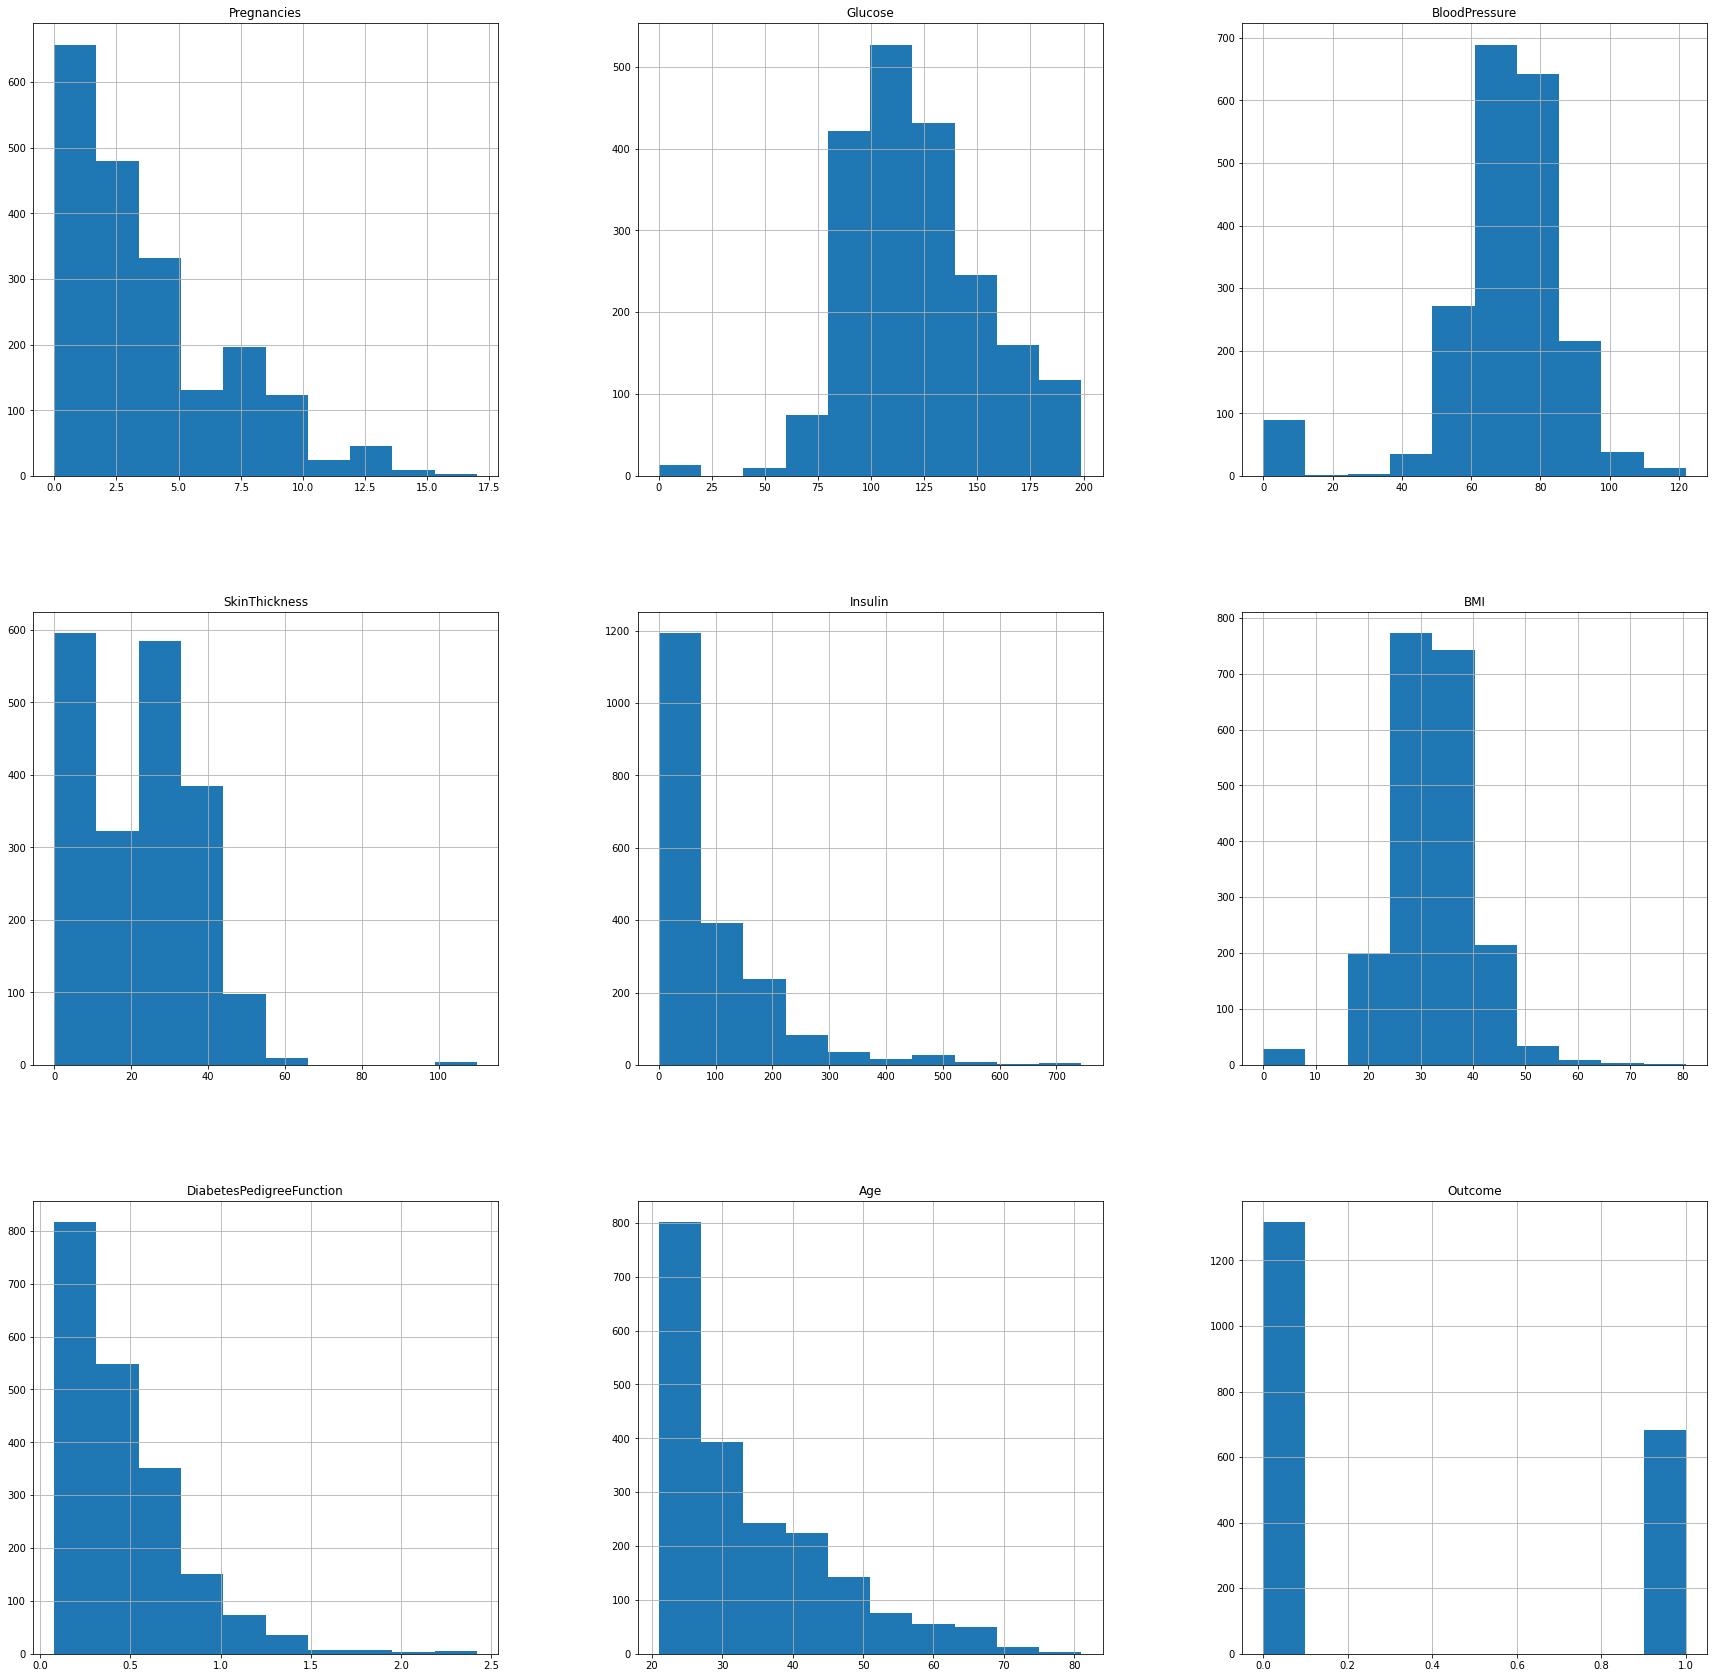

In [39]:
# plotting variation graphs for each property
df.hist(figsize = (30,30))

In [40]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

No null value present in data

### Correlation & heatmap generation

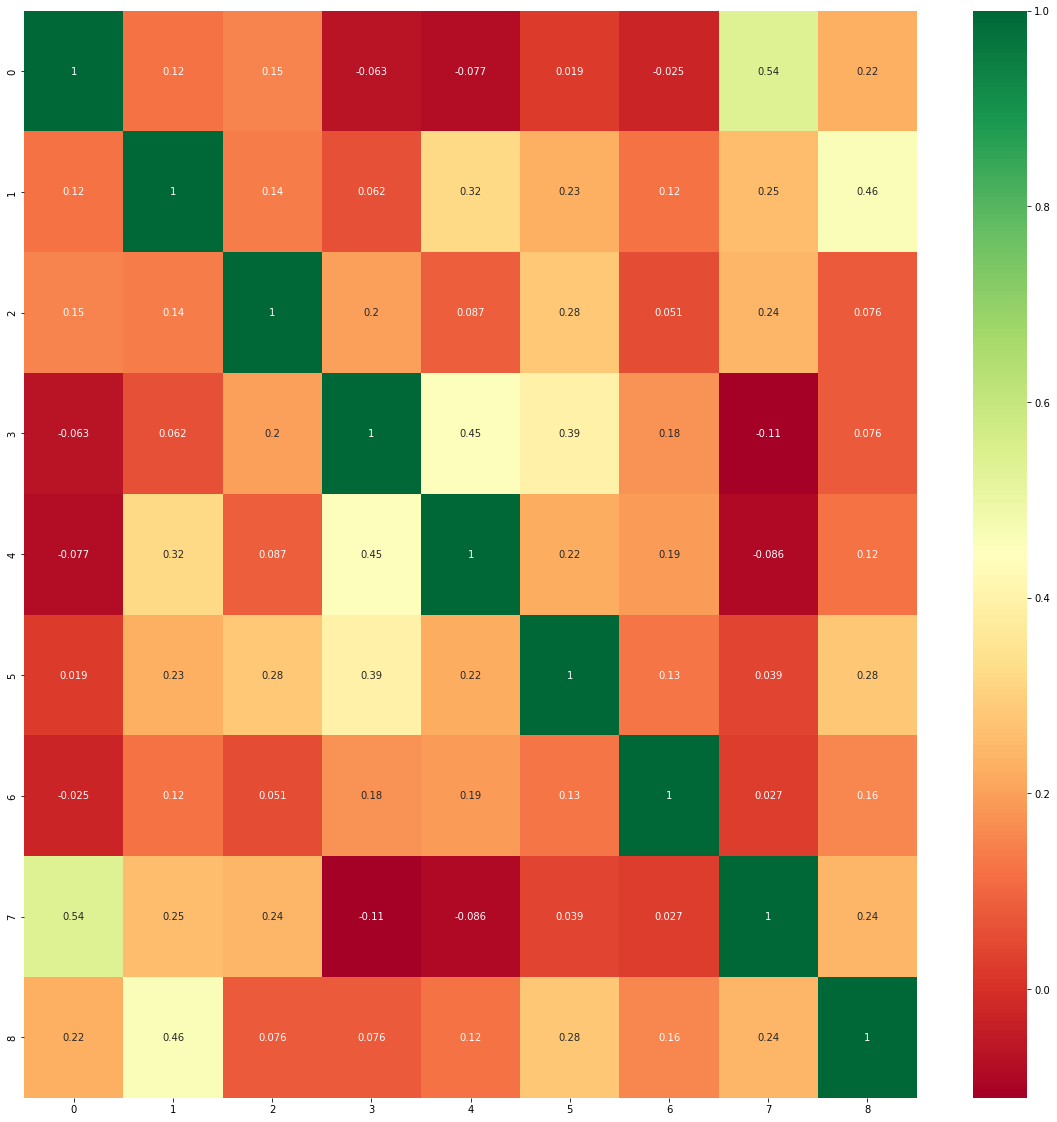

In [41]:
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [42]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

Checking if data has 0 values present 

In [43]:
print("Pregnancies: {0}".format(len(df.loc[df['Pregnancies'] == 0])))
print("Glucose: {0}".format(len(df.loc[df['Glucose'] == 0])))
print("bp: {0}".format(len(df.loc[df['BloodPressure'] == 0])))
print("SkinThickness: {0}".format(len(df.loc[df['SkinThickness'] == 0])))
print("Insulin: {0}".format(len(df.loc[df['Insulin'] == 0])))
print("BMI: {0}".format(len(df.loc[df['BMI'] == 0])))
print("DiabetesPedigreeFunction: {0}".format(len(df.loc[df['DiabetesPedigreeFunction'] == 0])))
print("Age: {0}".format(len(df.loc[df['Age'] == 0])))

Pregnancies: 301
Glucose: 13
bp: 90
SkinThickness: 573
Insulin: 956
BMI: 28
DiabetesPedigreeFunction: 0
Age: 0


### Preparing the data for model building


In [44]:
from sklearn.model_selection import train_test_split
feature_columns = ['Pregnancies', 'Glucose', 'BloodPressure','SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
predicted_class = ['Outcome']

Splitting dataset into train & test set


In [45]:
X = df[feature_columns]
y = df[predicted_class]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state=10)

In [46]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1400, 8), (600, 8), (1400, 1), (600, 1))

Filling in the 0 values present with the mean of that particular property


In [47]:
from sklearn.impute import SimpleImputer

fill_values = SimpleImputer(missing_values=0, strategy="mean")

X_train = fill_values.fit_transform(X_train)
X_test = fill_values.fit_transform(X_test)

##### Fitting the training data into RandomForest Classifier

In [48]:
from sklearn.ensemble import RandomForestClassifier
random_forest_model = RandomForestClassifier(random_state=10)

model = random_forest_model.fit(X_train, y_train)

##### Predicting model over test set & acquiring accuracy achieved


In [49]:
predict_train_data = model.predict(X_test)

from sklearn import metrics

print("Accuracy = {0:.3f}".format(metrics.accuracy_score(y_test, predict_train_data)))

Accuracy = 0.968


##### Confusion matrix for prediction TP,TN,FP,FN

In [50]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predict_train_data)
cm

array([[389,   9],
       [ 10, 192]])

In [51]:
from sklearn.metrics import classification_report
# Print the evaluation metrics for the dataset.
print(classification_report(y_test, predict_train_data))

              precision    recall  f1-score   support

           0       0.97      0.98      0.98       398
           1       0.96      0.95      0.95       202

    accuracy                           0.97       600
   macro avg       0.97      0.96      0.96       600
weighted avg       0.97      0.97      0.97       600



Text(0.5, 1.0, 'Confusion Matrix')

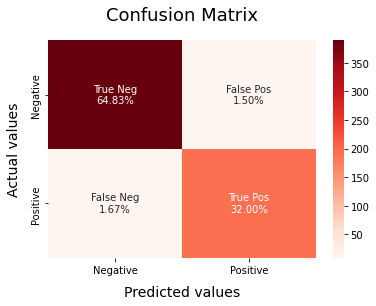

In [52]:
categories  = ['Negative','Positive']
group_names = ['True Neg','False Pos', 'False Neg','True Pos']
group_percentages = ['{0:.2%}'.format(value) for value in cm.flatten() / np.sum(cm)]

labels = [f'{v1}\n{v2}' for v1, v2 in zip(group_names,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

sns.heatmap(cm, annot = labels, cmap = 'Reds',fmt = '',
                xticklabels = categories, yticklabels = categories)

plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
plt.ylabel("Actual values"   , fontdict = {'size':14}, labelpad = 10)
plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)

#### Saving the model

In [53]:
import joblib
joblib.dump(model, "./random_forest.joblib")

['./random_forest.joblib']